In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

We create a dummy data using Scikit-learn's `make_blob` method. For our purposes we will create 1,000 samples with two features (aka our x and y-axis values) that are linearly seperable into two groups.

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

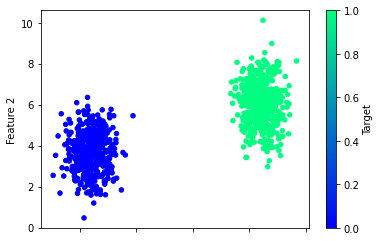

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

Now that we have our training data, we need to prepare the dataset for our neural network model. As with any machine learning algorithm, it is crucial to normalize or standardize our numerical variables to ensure that our neural network does not focus on outliers and can apply proper weights to each input. In most cases, the more that input variables are normalized to the same scale, the more stable the neural network model is, and the better the neural network model will generalize. 

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Finally, we have our data ready for our first neural network model! To create the neural network in our notebook, first we must create our Sequential model. To do this, we must add the following code to the notebook:

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

The Keras module does not have specific classes for input, hidden, and output layers. All layers are built using the Dense class, and the input and first hidden layer are always built in the same instance. we can add layers to our Sequential model using Keras' Dense class. For our first layer, we need to define a few parameters:

- The input_dimparameter indicates how many inputs will be in the model (in this case two).
- The units parameter indicates how many neurons we want in the hidden layer (in this case one).
- The activation parameter indicates which activation function to use. We'll use the ReLU activation function to allow our hidden layer to identify and train on nonlinear relationships in the dataset.

Putting it all together, our first Dense layer should have the following Python code:

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

Defining an activation function as part of the first layer is suggested but not required. By default, a Dense layer will look for linear relationships. Now that we have our input and hidden layers built, we need to add an output layer. Once again, we'll use the Dense class to tell our Sequential model what to do with the data. This time, we only need to supply the number of output neurons. For a classification model, we only want a yes or no binary decision; therefore, we only need one output neuron. In our previous layer, we used a ReLU activation function to enable nonlinear relationships; however, for our classification output, we want to use a sigmoid activation function to produce a probability output.

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Depending on the function of the neural network, we'll have to compile the neural network using a specific optimization function and loss metric. The optimization function shapes and molds a neural network model while it is being trained to ensure that it performs to the best of its ability. The loss metric is used by machine learning algorithms to score the performance of the model through each iteration and epoch by evaluating the inaccuracy of a single input. To enhance the performance of our classification neural network, we'll use the adam optimizer, which uses a gradient descent approach to ensure that the algorithm will not get stuck on weaker classifying variables and features. As for the loss function, we'll use binary_crossentropy, which is specifically designed to evaluate a binary classification model.

In addition to the optimization function and loss metric, we'll also add a more reader-friendly evaluation metric, which measures the quality of the machine learning model. There are two main types of evaluation metrics—the model predictive accuracy and model mean squared error (MSE). We use accuracy for classification models and msefor regression models. For model predictive accuracy, the higher the number the better, whereas for regression models, MSE should reduce to zero.

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 459us/step - loss: 0.6406 - accuracy: 0.8920
Epoch 2/100
24/24 [==============================] - 0s 417us/step - loss: 0.6321 - accuracy: 0.8973
Epoch 3/100
24/24 [==============================] - 0s 417us/step - loss: 0.6230 - accuracy: 0.9080
Epoch 4/100
24/24 [==============================] - 0s 417us/step - loss: 0.6132 - accuracy: 0.9147
Epoch 5/100
24/24 [==============================] - 0s 417us/step - loss: 0.6027 - accuracy: 0.9253
Epoch 6/100
24/24 [==============================] - 0s 417us/step - loss: 0.5916 - accuracy: 0.9360
Epoch 7/100
24/24 [==============================] - 0s 375us/step - loss: 0.5801 - accuracy: 0.9400
Epoch 8/100
24/24 [==============================] - 0s 417us/step - loss: 0.5681 - accuracy: 0.9440
Epoch 9/100
24/24 [==============================] - 0s 417us/step - loss: 0.5558 - accuracy: 0.9467
Epoch 10/100
24/24 [==============================] - 0s 375us/step - loss: 0.5431 - accura

24/24 [==============================] - 0s 417us/step - loss: 0.1060 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 417us/step - loss: 0.1041 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 417us/step - loss: 0.1022 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 417us/step - loss: 0.1004 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 417us/step - loss: 0.0987 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 417us/step - loss: 0.0970 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 417us/step - loss: 0.0953 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 417us/step - loss: 0.0936 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 375us/step - loss: 0.0920 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 459us/step - loss: 0.0905 - accuracy: 

<AxesSubplot:>

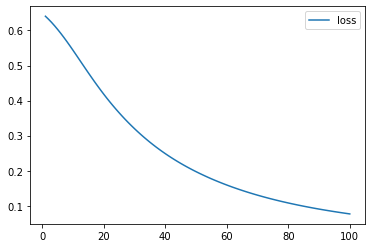

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

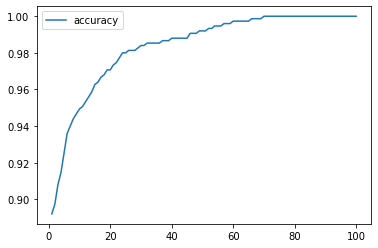

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0713 - accuracy: 1.0000
Loss: 0.07134351879358292, Accuracy: 1.0


Looking at the performance metrics from the model, the neural network was able to correctly classify each of the points in the test data. In other words, the model was able to correctly classify data it was not trained on 100% of the time. Although perfect model performance is ideal, more complex datasets and models may not be able to achieve 100% accuracy. Therefore, it is important to establish model performance thresholds before designing any machine learning model. Depending on the type of data and the use case, we may have to recreate and retrain a model using different parameters, different training/test data, or even look to use a different model entirely.

Now that we have a trained neural network model and we have verified its performance using a test dataset, we can apply this model to novel datasets and predict the classification of a data point. In our Sequential model, we can use the predict method to generate predictions on new data. For example, if we wanted to predict the class of a new blob dataset, we can add and run the following code:

In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

Now that we have designed a basic single-neuron, single-layer model, trained the model, and evaluated its performance using a test dataset, we are ready to start testing the limits of the basic neural network. As previously mentioned, simple linear regression and singular perceptron models work really well as a binary classifier when the data is linearly separable. But what about nonlinear data? How does our basic neural network model behave when data becomes more complicated?

To test this behavior, let's generate some new dummy data. This time we'll generate some nonlinear moon-shaped data using Scikit-learn's make_moons method and visualize it using Pandas and Matplotlib. Using the same notebook, we'll add and run the following code:

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

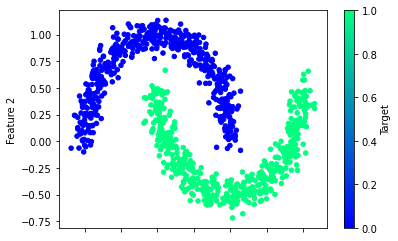

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 584us/step - loss: 1.1553 - accuracy: 0.4347
Epoch 2/100
24/24 [==============================] - 0s 584us/step - loss: 1.0099 - accuracy: 0.4613
Epoch 3/100
24/24 [==============================] - 0s 542us/step - loss: 0.9151 - accuracy: 0.4880
Epoch 4/100
24/24 [==============================] - 0s 584us/step - loss: 0.8524 - accuracy: 0.5067
Epoch 5/100
24/24 [==============================] - 0s 584us/step - loss: 0.8062 - accuracy: 0.5227
Epoch 6/100
24/24 [==============================] - 0s 584us/step - loss: 0.7698 - accuracy: 0.5440
Epoch 7/100
24/24 [==============================] - 0s 542us/step - loss: 0.7389 - accuracy: 0.5627
Epoch 8/100
24/24 [==============================] - 0s 542us/step - loss: 0.7134 - accuracy: 0.5747
Epoch 9/100
24/24 [==============================] - 0s 584us/step - loss: 0.6904 - accuracy: 0.5840
Epoch 10/100
24/24 [==============================] - 0s 542us/step - loss: 0.6700 - accura

Epoch 81/100
24/24 [==============================] - 0s 626us/step - loss: 0.2872 - accuracy: 0.8733
Epoch 82/100
24/24 [==============================] - 0s 626us/step - loss: 0.2860 - accuracy: 0.8733
Epoch 83/100
24/24 [==============================] - 0s 626us/step - loss: 0.2849 - accuracy: 0.8733
Epoch 84/100
24/24 [==============================] - 0s 626us/step - loss: 0.2838 - accuracy: 0.8733
Epoch 85/100
24/24 [==============================] - 0s 626us/step - loss: 0.2828 - accuracy: 0.8733
Epoch 86/100
24/24 [==============================] - 0s 667us/step - loss: 0.2817 - accuracy: 0.8733
Epoch 87/100
24/24 [==============================] - 0s 626us/step - loss: 0.2808 - accuracy: 0.8733
Epoch 88/100
24/24 [==============================] - 0s 626us/step - loss: 0.2799 - accuracy: 0.8733
Epoch 89/100
24/24 [==============================] - 0s 584us/step - loss: 0.2790 - accuracy: 0.8747
Epoch 90/100
24/24 [==============================] - 0s 626us/step - loss: 0.2781

<AxesSubplot:>

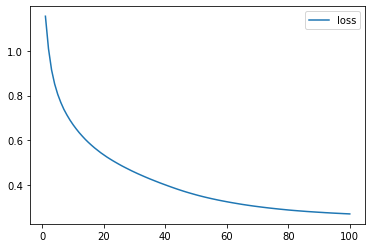

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

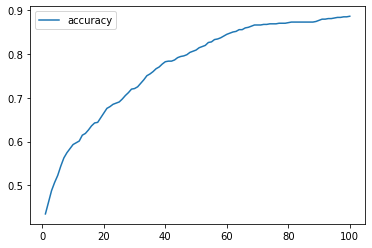

In [19]:
# Plot the loss
history_df.plot(y="accuracy")

According to the accuracy metric, the basic single-neuron, single-layer neural network model was only able to correctly classify 89% of all data points in the nonlinear training data. Depending on a person's use case, 89% accuracy could be sufficient for a first-pass model. For example, if we were trying to use a neural network model to separate left-handed people from right-handed people, a model that is correct 89% of the time is very accurate, and guessing incorrectly does not have a huge negative impact.

However, in many industrial and medical use cases, a model's classification accuracy must exceed 95% or even 99%. In these cases, we wouldn't be satisfied with the basic single-neuron, single-layer neural network model, and we would have to design a more robust neural network. In summary, the more complicated and nonlinear the dataset, the more components we'd need to add to a neural network to achieve our desired performance.

adding neurons to a neural network can help to generate a well-performing model faster than using a single-neuron, single-layer neural network. In fact, there are multiple advantages to adding neurons to our hidden layer in a neural network. Some of the advantages follow:

There is a distributed effort to find optimal weights—faster.
Each neuron can focus on different features to identify nonlinear effects—smarter.
It is less likely to fixate on complex variables—more robust.
So, if adding more neurons to our neural network model increases the performance, why wouldn't we always use the maximum number of neurons? There are two main reasons to limit the number of neurons in a neural network model: overfitting and computation resources. Similar to other machine learning algorithms, neural networks are susceptible to overfitting where the model fits the training data too well. As a result of overfitting, the neural network will not generalize well and won't be able to classify new data correctly. Additionally, a neural network model with a large number of neurons requires equally large training dataset—training a large neural network requires more data, more epochs, and more time. Therefore, it is important that a neural network model has an appropriate number of neurons to match the size of the data, the complexity of the problem, and the amount of input neurons.

A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the hidden layer as the number of inputs.

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 417us/step - loss: 0.6951 - accuracy: 0.3720
Epoch 2/100
24/24 [==============================] - 0s 375us/step - loss: 0.6478 - accuracy: 0.7173
Epoch 3/100
24/24 [==============================] - 0s 375us/step - loss: 0.6046 - accuracy: 0.7893
Epoch 4/100
24/24 [==============================] - 0s 375us/step - loss: 0.5650 - accuracy: 0.8187
Epoch 5/100
24/24 [==============================] - 0s 375us/step - loss: 0.5291 - accuracy: 0.8387
Epoch 6/100
24/24 [==============================] - 0s 375us/step - loss: 0.4967 - accuracy: 0.8453
Epoch 7/100
24/24 [==============================] - 0s 375us/step - loss: 0.4678 - accuracy: 0.8507
Epoch 8/100
24/24 [==============================] - 0s 417us/step - loss: 0.4422 - accuracy: 0.8493
Epoch 9/100
24/24 [==============================] - 0s 375us/step - loss: 0.4199 - accuracy: 0.8547
Epoch 10/100
24/24 [==============================] - 0s 375us/step - loss: 0.4000 - accura

24/24 [==============================] - 0s 375us/step - loss: 0.2344 - accuracy: 0.8947
Epoch 82/100
24/24 [==============================] - 0s 417us/step - loss: 0.2340 - accuracy: 0.8960
Epoch 83/100
24/24 [==============================] - 0s 417us/step - loss: 0.2337 - accuracy: 0.8947
Epoch 84/100
24/24 [==============================] - 0s 459us/step - loss: 0.2334 - accuracy: 0.8947
Epoch 85/100
24/24 [==============================] - 0s 417us/step - loss: 0.2331 - accuracy: 0.8947
Epoch 86/100
24/24 [==============================] - 0s 417us/step - loss: 0.2327 - accuracy: 0.8947
Epoch 87/100
24/24 [==============================] - 0s 417us/step - loss: 0.2325 - accuracy: 0.8947
Epoch 88/100
24/24 [==============================] - 0s 417us/step - loss: 0.2322 - accuracy: 0.8947
Epoch 89/100
24/24 [==============================] - 0s 459us/step - loss: 0.2320 - accuracy: 0.8947
Epoch 90/100
24/24 [==============================] - 0s 459us/step - loss: 0.2316 - accuracy: 

Looking at the training metrics of our new model, as we increase the number of neurons within the hidden layer, the classification accuracy improves. You may have noticed that adding multiple neurons to our neural network did not yield a perfect classification model. As input data becomes more complex, neural networks will require more and more optimization tweaks to achieve their desired accuracy.